In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#loading dataset
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [111]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [112]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

# **overall batting performance**

In [42]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


## 1. Total Runs Per Batsman

In [33]:
batsman_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False)
batsman_runs

batter
V Kohli         8014
S Dhawan        6769
RG Sharma       6630
DA Warner       6567
SK Raina        5536
                ... 
S Ladda            0
S Lamichhane       0
Abdur Razzak       0
SS Cottrell        0
KM Asif            0
Name: batsman_runs, Length: 673, dtype: int64

In [79]:
top_10_by_runs = batsman_runs.head(10)
top_10_by_runs

,batter,batsman_runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


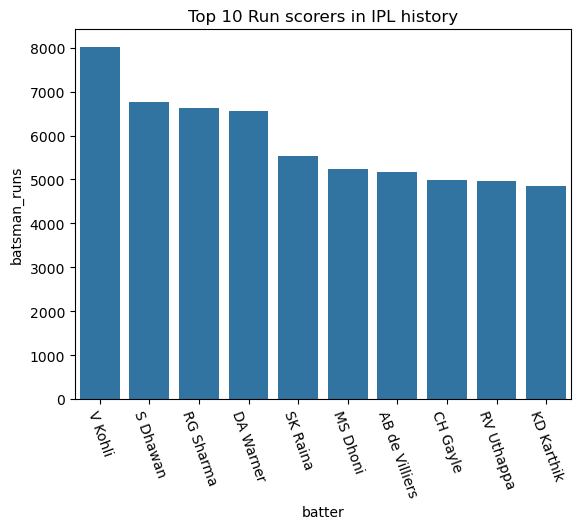

In [87]:
sns.barplot(data=top_10_by_runs,x = 'batter',y = 'batsman_runs')
plt.xticks(rotation = -70)
plt.title('Top 10 Run scorers in IPL history')
plt.show()

## 2. Batting Average & Strike Rate

In [55]:
# Group by batter and sum total runs
batsman_stats = deliveries.groupby("batter")["batsman_runs"].agg(["sum", "count"]).reset_index()

# Rename columns for clarity
batsman_stats.rename(columns={"sum": "total_runs", "count": "balls_faced"}, inplace=True)


In [56]:
batsman_stats

,batter,total_runs,balls_faced
0,A Ashish Reddy,280,196
1,A Badoni,634,505
2,A Chandila,4,7
3,A Chopra,53,75
4,A Choudhary,25,20
...,...,...,...
668,Yashpal Singh,47,67
669,Younis Khan,3,7
670,Yudhvir Singh,22,16
671,Yuvraj Singh,2754,2207


In [57]:
# Filter only rows where a batsman got out (valid dismissals)
dismissals = deliveries[deliveries["player_dismissed"].notna()]

dismissals


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,NaN,1,SC Ganguly,caught,JH Kallis
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,NaN,1,RT Ponting,caught,P Kumar
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,NaN,1,DJ Hussey,caught,CL White
131,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,I Sharma,W Jaffer,0,0,0,NaN,1,R Dravid,bowled,NaN
138,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,1,V Kohli,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260826,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,14,1,H Klaasen,Harshit Rana,PJ Cummins,0,0,0,NaN,1,H Klaasen,bowled,NaN
260848,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN
260852,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,1,PJ Cummins,caught,MA Starc
260861,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,1,2,SP Narine,PJ Cummins,Rahmanullah Gurbaz,0,0,0,NaN,1,SP Narine,caught,Shahbaz Ahmed


In [59]:
# Count number of times each batsman got out
dismissals_count = dismissals.groupby("player_dismissed")["player_dismissed"].count().reset_index(name="dismissals")

dismisal_count

,batter,is_wicket
0,RG Sharma,232
1,V Kohli,218
2,S Dhawan,194
3,KD Karthik,189
4,RV Uthappa,184
...,...,...
668,P Sahu,0
669,L Ablish,0
670,JR Hazlewood,0
671,Mukesh Choudhary,0


In [60]:
# Merge with batsman stats
batsman_stats = batsman_stats.merge(dismissals_count, left_on="batter", right_on="player_dismissed", how="left")

batsman_stats

,batter,total_runs,balls_faced,player_dismissed,dismissals
0,A Ashish Reddy,280,196,A Ashish Reddy,15.0
1,A Badoni,634,505,A Badoni,26.0
2,A Chandila,4,7,NaN,NaN
3,A Chopra,53,75,A Chopra,6.0
4,A Choudhary,25,20,A Choudhary,1.0
...,...,...,...,...,...
668,Yashpal Singh,47,67,Yashpal Singh,4.0
669,Younis Khan,3,7,Younis Khan,1.0
670,Yudhvir Singh,22,16,Yudhvir Singh,4.0
671,Yuvraj Singh,2754,2207,Yuvraj Singh,111.0


In [63]:
# Fill NaN (for batsmen who never got out) with 0
batsman_stats["dismissals"].fillna(0, inplace=True)
batsman_stats.sort_values(by = 'total_runs' ,ascending=False)

C:\Temp\ipykernel_2128\3863980417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batsman_stats["dismissals"].fillna(0, inplace=True)


,batter,total_runs,balls_faced,player_dismissed,dismissals
631,V Kohli,8014,6236,V Kohli,207.0
512,S Dhawan,6769,5483,S Dhawan,193.0
477,RG Sharma,6630,5183,RG Sharma,223.0
147,DA Warner,6567,4849,DA Warner,164.0
546,SK Raina,5536,4177,SK Raina,171.0
...,...,...,...,...,...
517,S Ladda,0,10,S Ladda,1.0
518,S Lamichhane,0,1,S Lamichhane,1.0
69,Abdur Razzak,0,2,NaN,0.0
565,SS Cottrell,0,2,SS Cottrell,1.0


In [64]:
# Batting Average (Avoid division by zero)
batsman_stats["batting_average"] = batsman_stats["total_runs"] / batsman_stats["dismissals"]
batsman_stats["batting_average"].replace([float("inf"), float("nan")], 0, inplace=True)

batsman_stats


C:\Temp\ipykernel_2128\1816344157.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batsman_stats["batting_average"].replace([float("inf"), float("nan")], 0, inplace=True)


,batter,total_runs,balls_faced,player_dismissed,dismissals,batting_average
0,A Ashish Reddy,280,196,A Ashish Reddy,15.0,18.666667
1,A Badoni,634,505,A Badoni,26.0,24.384615
2,A Chandila,4,7,NaN,0.0,0.000000
3,A Chopra,53,75,A Chopra,6.0,8.833333
4,A Choudhary,25,20,A Choudhary,1.0,25.000000
...,...,...,...,...,...,...
668,Yashpal Singh,47,67,Yashpal Singh,4.0,11.750000
669,Younis Khan,3,7,Younis Khan,1.0,3.000000
670,Yudhvir Singh,22,16,Yudhvir Singh,4.0,5.500000
671,Yuvraj Singh,2754,2207,Yuvraj Singh,111.0,24.810811


In [65]:
# Strike Rate
batsman_stats["strike_rate"] = (batsman_stats["total_runs"] / batsman_stats["balls_faced"]) * 100
batsman_stats

,batter,total_runs,balls_faced,player_dismissed,dismissals,batting_average,strike_rate
0,A Ashish Reddy,280,196,A Ashish Reddy,15.0,18.666667,142.857143
1,A Badoni,634,505,A Badoni,26.0,24.384615,125.544554
2,A Chandila,4,7,NaN,0.0,0.000000,57.142857
3,A Chopra,53,75,A Chopra,6.0,8.833333,70.666667
4,A Choudhary,25,20,A Choudhary,1.0,25.000000,125.000000
...,...,...,...,...,...,...,...
668,Yashpal Singh,47,67,Yashpal Singh,4.0,11.750000,70.149254
669,Younis Khan,3,7,Younis Khan,1.0,3.000000,42.857143
670,Yudhvir Singh,22,16,Yudhvir Singh,4.0,5.500000,137.500000
671,Yuvraj Singh,2754,2207,Yuvraj Singh,111.0,24.810811,124.784776


In [67]:
batsman_stats.sort_values(by = 'total_runs',ascending=False)

,batter,total_runs,balls_faced,player_dismissed,dismissals,batting_average,strike_rate
631,V Kohli,8014,6236,V Kohli,207.0,38.714976,128.511867
512,S Dhawan,6769,5483,S Dhawan,193.0,35.072539,123.454313
477,RG Sharma,6630,5183,RG Sharma,223.0,29.730942,127.918194
147,DA Warner,6567,4849,DA Warner,164.0,40.042683,135.429986
546,SK Raina,5536,4177,SK Raina,171.0,32.374269,132.535312
...,...,...,...,...,...,...,...
517,S Ladda,0,10,S Ladda,1.0,0.000000,0.000000
518,S Lamichhane,0,1,S Lamichhane,1.0,0.000000,0.000000
69,Abdur Razzak,0,2,NaN,0.0,0.000000,0.000000
565,SS Cottrell,0,2,SS Cottrell,1.0,0.000000,0.000000


In [68]:
# Sort and display top 10 batsmen based on batting average
batsman_stats.sort_values(by="batting_average", ascending=False).head(10)

,batter,total_runs,balls_faced,player_dismissed,dismissals,batting_average,strike_rate
648,Vivrant Sharma,69,49,Vivrant Sharma,1.0,69.000000,140.816327
370,MN van Wyk,167,135,MN van Wyk,3.0,55.666667,123.703704
170,DP Conway,924,669,DP Conway,19.0,48.631579,138.116592
96,B Sai Sudharsan,1034,770,B Sai Sudharsan,22.0,47.000000,134.285714
34,AC Voges,181,143,AC Voges,4.0,45.250000,126.573427
289,KL Rahul,4689,3578,KL Rahul,105.0,44.657143,131.050866
214,HM Amla,577,418,HM Amla,13.0,44.384615,138.038278
230,Iqbal Abdulla,88,86,Iqbal Abdulla,2.0,44.000000,102.325581
473,RD Gaikwad,2380,1781,RD Gaikwad,57.0,41.754386,133.632791
115,C Green,707,472,C Green,17.0,41.588235,149.788136


In [70]:
# Sort and display top 10 batsmen based on strike rate 
batsman_stats.sort_values(by="strike_rate", ascending=False).head(20)

,batter,total_runs,balls_faced,player_dismissed,dismissals,batting_average,strike_rate
312,L Wood,9,3,NaN,0.0,0.000000,300.000000
97,B Stanlake,5,2,NaN,0.0,0.000000,250.000000
234,J Fraser-McGurk,330,150,J Fraser-McGurk,9.0,36.666667,220.000000
461,R Sai Kishore,13,6,R Sai Kishore,1.0,13.000000,216.666667
629,Umar Gul,39,19,Umar Gul,3.0,13.000000,205.263158
497,RS Sodhi,4,2,NaN,0.0,0.000000,200.000000
583,Shahid Afridi,81,46,Shahid Afridi,8.0,10.125000,176.086957
222,I Malhotra,7,4,NaN,0.0,0.000000,175.000000
652,WG Jacks,230,133,WG Jacks,7.0,32.857143,172.932331
433,PD Salt,653,385,PD Salt,19.0,34.368421,169.610390


In [74]:
# Filter the batsmen with a batting average >= 30 and strike rate >= 130 and total_runs >= 1000
filtered_batsmen = batsman_stats[(batsman_stats['batting_average'] >= 30) & (batsman_stats['strike_rate'] >= 130) & (batsman_stats['total_runs'] >= 1000)]

# Sort the filtered batsmen (if needed) and get the top 10
top_10_batsmen = filtered_batsmen.sort_values(by='batting_average', ascending=False).head(10)

top_10_batsmen


,batter,total_runs,balls_faced,player_dismissed,dismissals,batting_average,strike_rate
96,B Sai Sudharsan,1034,770,B Sai Sudharsan,22.0,47.000000,134.285714
289,KL Rahul,4689,3578,KL Rahul,105.0,44.657143,131.050866
473,RD Gaikwad,2380,1781,RD Gaikwad,57.0,41.754386,133.632791
147,DA Warner,6567,4849,DA Warner,164.0,40.042683,135.429986
623,Tilak Varma,1156,830,Tilak Varma,29.0,39.862069,139.277108
30,AB de Villiers,5181,3487,AB de Villiers,130.0,39.853846,148.580442
124,CH Gayle,4997,3516,CH Gayle,126.0,39.658730,142.121729
542,SE Marsh,2489,1913,SE Marsh,63.0,39.507937,130.109775
374,MS Dhoni,5243,3947,MS Dhoni,134.0,39.126866,132.835065
592,Shubman Gill,3216,2432,Shubman Gill,85.0,37.835294,132.236842


In [89]:
# Melt the DataFrame
melted_df = top_10_batsmen.melt(id_vars='batter', value_vars=['total_runs', 'batting_average', 'strike_rate'],
                                var_name='metric', value_name='value')
melted_df

,batter,metric,value
0,B Sai Sudharsan,total_runs,1034.000000
1,KL Rahul,total_runs,4689.000000
2,RD Gaikwad,total_runs,2380.000000
3,DA Warner,total_runs,6567.000000
4,Tilak Varma,total_runs,1156.000000
5,AB de Villiers,total_runs,5181.000000
6,CH Gayle,total_runs,4997.000000
7,SE Marsh,total_runs,2489.000000
8,MS Dhoni,total_runs,5243.000000
9,Shubman Gill,total_runs,3216.000000


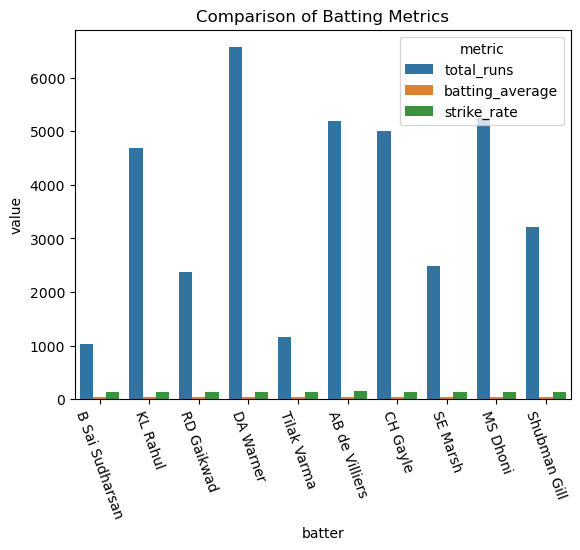

<Figure size 1500x1000 with 0 Axes>

In [92]:
# Create a grouped bar plot
sns.barplot(data=melted_df, x='batter', y='value', hue='metric')
plt.title("Comparison of Batting Metrics")
plt.xticks(rotation = -70)
plt.figure(figsize=(15,10))
plt.show()

## 3. Most 50s & 100s

In [76]:
# Group by match_id and batter to get total runs scored in that match
batsman_innings = deliveries.groupby(["match_id", "batter"])["batsman_runs"].sum().reset_index()

# Count 50s and 100s
batsman_innings["fifties"] = batsman_innings["batsman_runs"].between(50, 99).astype(int)
batsman_innings["hundreds"] = (batsman_innings["batsman_runs"] >= 100).astype(int)
batsman_innings

,match_id,batter,batsman_runs,fifties,hundreds
0,335982,AA Noffke,9,0,0
1,335982,B Akhil,0,0,0
2,335982,BB McCullum,158,0,1
3,335982,CL White,6,0,0
4,335982,DJ Hussey,12,0,0
...,...,...,...,...,...
16510,1426312,SP Narine,6,0,0
16511,1426312,SS Iyer,6,0,0
16512,1426312,Shahbaz Ahmed,8,0,0
16513,1426312,TM Head,0,0,0


In [77]:
# Group by batsman and sum the number of 50s and 100s
batsman_scores = batsman_innings.groupby("batter")[["fifties", "hundreds"]].sum().reset_index()
batsman_scores

,batter,fifties,hundreds
0,A Ashish Reddy,0,0
1,A Badoni,4,0
2,A Chandila,0,0
3,A Chopra,0,0
4,A Choudhary,0,0
...,...,...,...
668,Yashpal Singh,0,0
669,Younis Khan,0,0
670,Yudhvir Singh,0,0
671,Yuvraj Singh,13,0


In [98]:
# Sort by most hundreds first, then fifties
batsman_scores = batsman_scores.sort_values(by=["hundreds", "fifties"], ascending=[False, False]).head(10)
batsman_scores

,batter,fifties,hundreds
631,V Kohli,56,8
242,JC Buttler,19,7
124,CH Gayle,32,6
147,DA Warner,62,4
289,KL Rahul,37,4
564,SR Watson,21,4
592,Shubman Gill,20,4
30,AB de Villiers,41,3
572,SV Samson,25,3
512,S Dhawan,51,2


In [100]:
melted_batsman_scores = batsman_scores.melt(id_vars='batter',value_vars=['fifties','hundreds'],var_name='50s/100s',value_name='value')
melted_batsman_scores

,batter,50s/100s,value
0,V Kohli,fifties,56
1,JC Buttler,fifties,19
2,CH Gayle,fifties,32
3,DA Warner,fifties,62
4,KL Rahul,fifties,37
5,SR Watson,fifties,21
6,Shubman Gill,fifties,20
7,AB de Villiers,fifties,41
8,SV Samson,fifties,25
9,S Dhawan,fifties,51


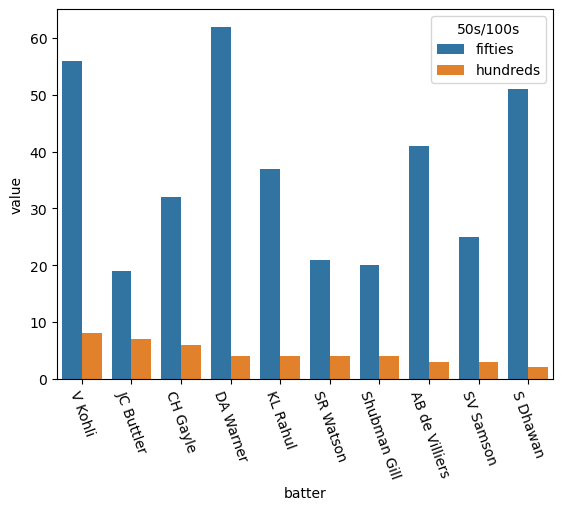

In [103]:
sns.barplot(data=melted_batsman_scores,x = 'batter',y='value',hue = '50s/100s')
plt.xticks(rotation = -70)
plt.show()

# **Season-wise Batting Performance**

*We will analyze batting performance on a seasonal basis, covering:*  
*- Top scorers per season*  
*- Most 50+ scores in a season*   

In [122]:
match_data = pd.read_csv('matches.csv')
ball_data = pd.read_csv('deliveries.csv')

In [126]:
match_data = match_data.rename(columns={'id':'match_id'})

In [127]:
match_data

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [131]:
ball_data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [129]:
# now combining these two data based on match id as:
ipl_data = pd.merge(match_data,ball_data,on='match_id')
ipl_data

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [130]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   season            260920 non-null  object 
 2   city              248523 non-null  object 
 3   date              260920 non-null  object 
 4   match_type        260920 non-null  object 
 5   player_of_match   260430 non-null  object 
 6   venue             260920 non-null  object 
 7   team1             260920 non-null  object 
 8   team2             260920 non-null  object 
 9   toss_winner       260920 non-null  object 
 10  toss_decision     260920 non-null  object 
 11  winner            260430 non-null  object 
 12  result            260920 non-null  object 
 13  result_margin     256796 non-null  float64
 14  target_runs       260611 non-null  float64
 15  target_overs      260611 non-null  float64
 16  super_over        26

In [135]:
#finding Top Scorers Per Season
season_batsman_runs = ipl_data.groupby(['season','batter'])['batsman_runs'].sum().reset_index()
season_batsman_runs

,season,batter,batsman_runs
0,2007/08,A Chopra,42
1,2007/08,A Kumble,13
2,2007/08,A Mishra,37
3,2007/08,A Mukund,0
4,2007/08,A Nehra,3
...,...,...,...
2612,2024,WG Jacks,230
2613,2024,WP Saha,136
2614,2024,Washington Sundar,0
2615,2024,YBK Jaiswal,435


In [136]:
top_scorer_per_season = season_batsman_runs.sort_values(['season','batsman_runs'],ascending=[False,False])
top_scorer_per_season

,season,batter,batsman_runs
2606,2024,V Kohli,741
2559,2024,RD Gaikwad,583
2550,2024,R Parag,573
2601,2024,TM Head,567
2585,2024,SV Samson,531
...,...,...,...
58,2007/08,L Balaji,0
66,2007/08,M Muralitharan,0
75,2007/08,MM Patel,0
107,2007/08,S Sreesanth,0


In [138]:
# Display the top scorer for each season
top_scorers = top_scorer_per_season.groupby('season').first().reset_index()
top_scorers

,season,batter,batsman_runs
0,2007/08,SE Marsh,616
1,2009,ML Hayden,572
2,2009/10,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


In [139]:
top_scorers['batter'].value_counts()

batter
DA Warner        3
CH Gayle         2
V Kohli          2
SE Marsh         1
ML Hayden        1
SR Tendulkar     1
MEK Hussey       1
RV Uthappa       1
KS Williamson    1
KL Rahul         1
RD Gaikwad       1
JC Buttler       1
Shubman Gill     1
Name: count, dtype: int64

for most 50 + scores per season

In [147]:
match_wise_score = ipl_data.groupby(['season','match_id','batter'])['batsman_runs'].sum().reset_index()
match_wise_score

,season,match_id,batter,batsman_runs
0,2007/08,335982,AA Noffke,9
1,2007/08,335982,B Akhil,0
2,2007/08,335982,BB McCullum,158
3,2007/08,335982,CL White,6
4,2007/08,335982,DJ Hussey,12
...,...,...,...,...
16510,2024,1426312,SP Narine,6
16511,2024,1426312,SS Iyer,6
16512,2024,1426312,Shahbaz Ahmed,8
16513,2024,1426312,TM Head,0


In [148]:
match_wise_score['fifties'] = match_wise_score['batsman_runs'].between(50,99).astype(int)
match_wise_score['hundreds'] = (match_wise_score['batsman_runs'] >= 100).astype(int)
match_wise_score

,season,match_id,batter,batsman_runs,fifties,hundreds
0,2007/08,335982,AA Noffke,9,0,0
1,2007/08,335982,B Akhil,0,0,0
2,2007/08,335982,BB McCullum,158,0,1
3,2007/08,335982,CL White,6,0,0
4,2007/08,335982,DJ Hussey,12,0,0
...,...,...,...,...,...,...
16510,2024,1426312,SP Narine,6,0,0
16511,2024,1426312,SS Iyer,6,0,0
16512,2024,1426312,Shahbaz Ahmed,8,0,0
16513,2024,1426312,TM Head,0,0,0


In [150]:
season_batsman_50s_100s = match_wise_score.groupby(["season", "batter"])[["fifties", "hundreds"]].sum().reset_index()
season_batsman_50s_100s

,season,batter,fifties,hundreds
0,2007/08,A Chopra,0,0
1,2007/08,A Kumble,0,0
2,2007/08,A Mishra,0,0
3,2007/08,A Mukund,0,0
4,2007/08,A Nehra,0,0
...,...,...,...,...
2612,2024,WG Jacks,1,1
2613,2024,WP Saha,0,0
2614,2024,Washington Sundar,0,0
2615,2024,YBK Jaiswal,1,1


In [155]:
season_batsman_50s_100s["total_50plus"] = season_batsman_50s_100s["fifties"] + season_batsman_50s_100s["hundreds"]
max_index = season_batsman_50s_100s.groupby('season')['total_50plus'].idxmax()
season_batsman_50s_100s.loc[max_index]

,season,batter,fifties,hundreds,total_50plus
115,2007/08,SE Marsh,5,1,6
204,2009,JP Duminy,5,0,5
365,2009/10,JH Kallis,6,0,6
502,2011,CH Gayle,3,2,5
684,2012,CH Gayle,7,1,8
983,2013,V Kohli,7,0,7
1014,2014,DA Warner,6,0,6
1148,2015,DA Warner,7,0,7
1383,2016,V Kohli,7,4,11
1422,2017,DA Warner,4,1,5


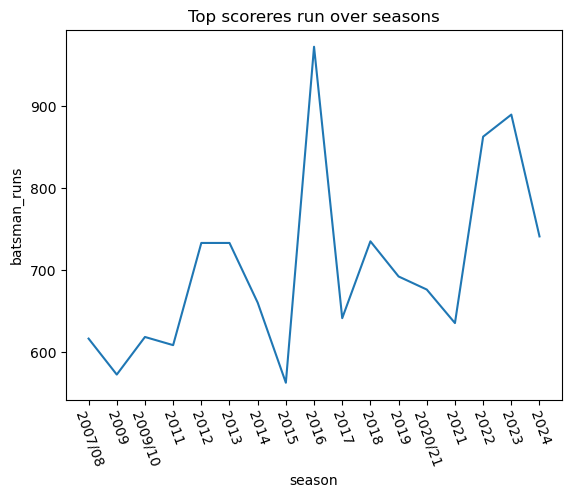

<Figure size 2000x1000 with 0 Axes>

In [168]:
sns.lineplot(data = top_scorers,x = 'season',y = 'batsman_runs')
plt.xticks(rotation = -70)
plt.title('Top scoreres run over seasons')
plt.figure(figsize=(20,10))
plt.show()

C:\Temp\ipykernel_2128\3136095819.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = season_batsman_50s_100s, x = 'season',y = 'total_50plus',palette='viridis')


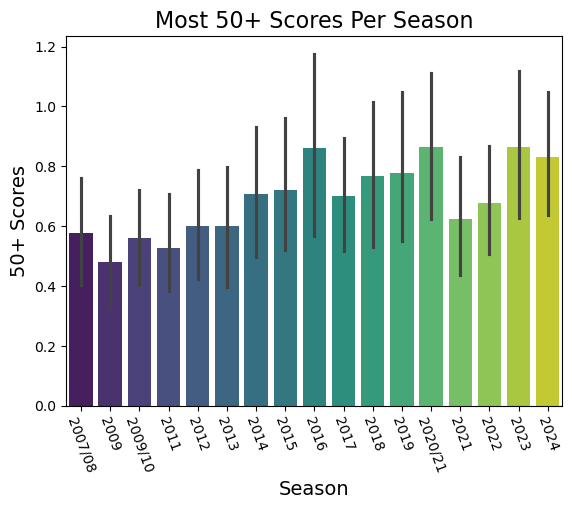

In [173]:
sns.barplot(data = season_batsman_50s_100s, x = 'season',y = 'total_50plus',palette='viridis')
plt.title('Most 50+ Scores Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('50+ Scores', fontsize=14)
plt.xticks(rotation=-70)
plt.show()

# **Batting Performance Against Teams**

## 1.Best Batsmen Against Specific Teams

In [177]:
kkr = ball_data[ball_data['bowling_team'] == 'Kolkata Knight Riders']
kkr

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN
260849,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,SP Narine,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN
260850,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN
260851,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN


In [182]:
top_10_against_kkr = kkr.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_against_kkr

,batter,batsman_runs
0,DA Warner,1093
1,RG Sharma,1070
2,V Kohli,962
3,S Dhawan,907
4,SK Raina,829
5,CH Gayle,700
6,AM Rahane,565
7,MS Dhoni,556
8,SV Samson,529
9,AB de Villiers,522


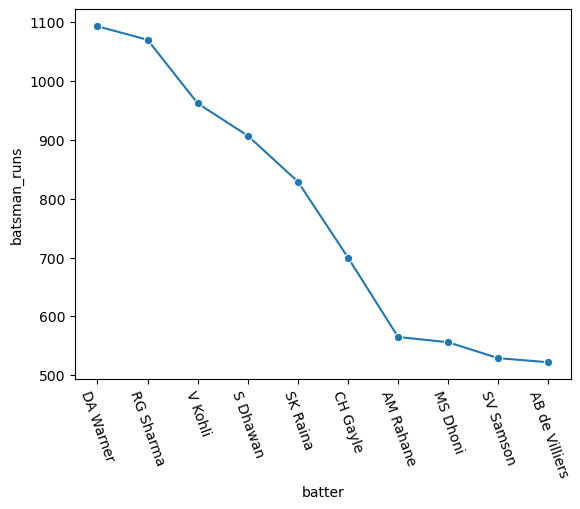

In [194]:
sns.lineplot(data = top_10_against_kkr,x= 'batter',y = 'batsman_runs',marker = 'o')
plt.xticks(rotation = -70)
plt.show()

*similarly we can do with each team*

## 2: Runs Scored vs Each Team

In [196]:
#Step 1: Filter the data to focus on batting performance against each team
# Group by batsman (batter) and bowling team (bowling_team), then sum the runs scored
runs_against_teams = deliveries.groupby(['batter', 'bowling_team'])['batsman_runs'].sum().reset_index()
runs_against_teams

,batter,bowling_team,batsman_runs
0,A Ashish Reddy,Chennai Super Kings,45
1,A Ashish Reddy,Delhi Daredevils,36
2,A Ashish Reddy,Kings XI Punjab,37
3,A Ashish Reddy,Kolkata Knight Riders,17
4,A Ashish Reddy,Mumbai Indians,27
...,...,...,...
4376,Z Khan,Kolkata Knight Riders,20
4377,Z Khan,Mumbai Indians,5
4378,Z Khan,Rajasthan Royals,18
4379,Z Khan,Royal Challengers Bangalore,25


In [197]:
# Step 2: Display the results for analysis
# You can filter for a specific team (e.g., CSK) to see how each player performed against them
csk_batting_performance = runs_against_teams[runs_against_teams['bowling_team'] == 'Chennai Super Kings']
csk_batting_performance

,batter,bowling_team,batsman_runs
0,A Ashish Reddy,Chennai Super Kings,45
8,A Badoni,Chennai Super Kings,101
33,A Kumble,Chennai Super Kings,3
39,A Manohar,Chennai Super Kings,12
46,A Mishra,Chennai Super Kings,58
...,...,...,...
4331,YS Chahal,Chennai Super Kings,12
4340,YV Dhull,Chennai Super Kings,13
4343,YV Takawale,Chennai Super Kings,19
4358,Yuvraj Singh,Chennai Super Kings,345


In [198]:
# To see the runs scored by each player against all teams, simply display the entire table
runs_against_teams.head()

,batter,bowling_team,batsman_runs
0,A Ashish Reddy,Chennai Super Kings,45
1,A Ashish Reddy,Delhi Daredevils,36
2,A Ashish Reddy,Kings XI Punjab,37
3,A Ashish Reddy,Kolkata Knight Riders,17
4,A Ashish Reddy,Mumbai Indians,27


In [202]:
index_max = runs_against_teams.groupby('bowling_team')['batsman_runs'].idxmax()
index_max

bowling_team
Chennai Super Kings            3362
Deccan Chargers                2955
Delhi Capitals                 1436
Delhi Daredevils               4133
Gujarat Lions                   904
Gujarat Titans                 3106
Kings XI Punjab                 906
Kochi Tuskers Kerala           3711
Kolkata Knight Riders           908
Lucknow Super Giants           1175
Mumbai Indians                 1837
Pune Warriors                   756
Punjab Kings                   4142
Rajasthan Royals               4143
Rising Pune Supergiant         2757
Rising Pune Supergiants        4145
Royal Challengers Bangalore     916
Royal Challengers Bengaluru    4062
Sunrisers Hyderabad            3803
Name: batsman_runs, dtype: int64

In [204]:
top_scorer_against_each_team = runs_against_teams.loc[index_max]
top_scorer_against_each_team

,batter,bowling_team,batsman_runs
3362,S Dhawan,Chennai Super Kings,1057
2955,R Dravid,Deccan Chargers,339
1436,Ishan Kishan,Delhi Capitals,436
4133,V Kohli,Delhi Daredevils,761
904,DA Warner,Gujarat Lions,336
3106,RD Gaikwad,Gujarat Titans,350
906,DA Warner,Kings XI Punjab,906
3711,SR Tendulkar,Kochi Tuskers Kerala,100
908,DA Warner,Kolkata Knight Riders,1093
1175,F du Plessis,Lucknow Super Giants,238


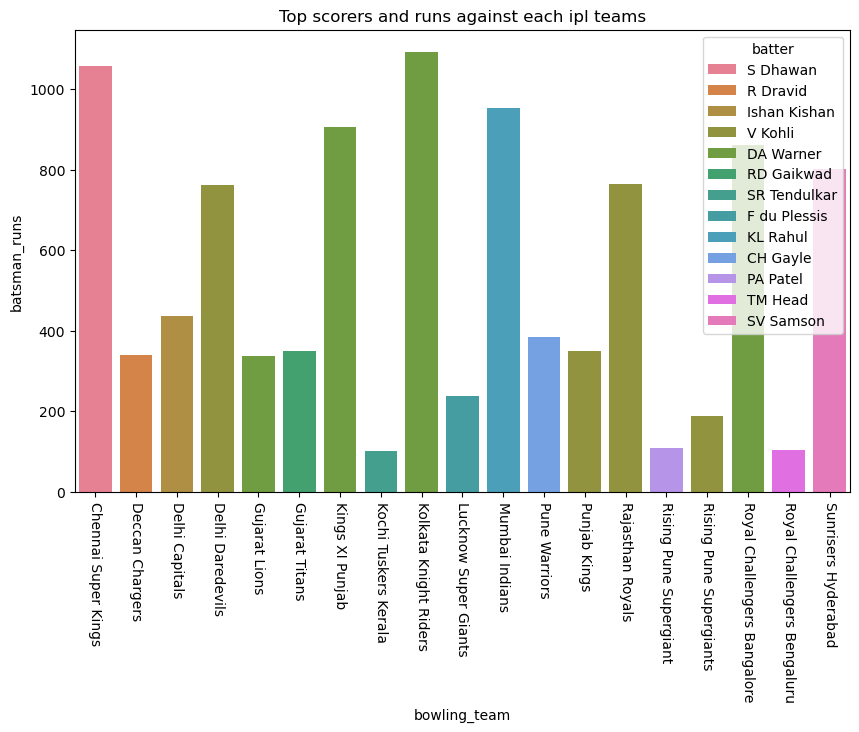

In [215]:
plt.figure(figsize=(10, 6))
sns.barplot(data = top_scorer_against_each_team,x = 'bowling_team',y = 'batsman_runs',hue = 'batter')
plt.xticks(rotation = -90)
plt.title('Top scorers and runs against each ipl teams')
plt.show()

# **Situational Batting Analysis**

## 1.Best Chasers (2nd Innings Performance)

In [219]:
ball_data_second_inning = ball_data[ball_data['inning']==2]
ball_data_second_inning

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [222]:
second_inning_batsman_stat = ball_data_second_inning.groupby('batter')['batsman_runs'].agg(['sum','count']).reset_index()
second_inning_batsman_stat.rename(columns = {"sum":"batsman_runs","count":"balls_faced"},inplace=True)
second_inning_batsman_stat

,batter,batsman_runs,balls_faced
0,A Ashish Reddy,114,81
1,A Badoni,170,167
2,A Chopra,2,3
3,A Choudhary,10,8
4,A Flintoff,40,43
...,...,...,...
610,Yashpal Singh,34,46
611,Younis Khan,3,7
612,Yudhvir Singh,21,14
613,Yuvraj Singh,1240,1074


In [223]:
dismissals = ball_data_second_inning[deliveries["player_dismissed"].notna()]
dismissals

C:\Temp\ipykernel_2128\1748939534.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dismissals = ball_data_second_inning[deliveries["player_dismissed"].notna()]


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
131,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,I Sharma,W Jaffer,0,0,0,NaN,1,R Dravid,bowled,NaN
138,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,1,V Kohli,bowled,NaN
154,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,4,5,JH Kallis,AB Agarkar,W Jaffer,0,0,0,NaN,1,JH Kallis,caught,M Kartik
157,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,2,W Jaffer,AB Dinda,CL White,0,0,0,NaN,1,W Jaffer,caught,RT Ponting
174,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,7,5,MV Boucher,SC Ganguly,CL White,0,0,0,NaN,1,MV Boucher,caught,M Kartik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260683,1426311,2,Rajasthan Royals,Sunrisers Hyderabad,11,4,R Ashwin,Shahbaz Ahmed,Dhruv Jurel,0,0,0,NaN,1,R Ashwin,caught,H Klaasen
260696,1426311,2,Rajasthan Royals,Sunrisers Hyderabad,13,4,SO Hetmyer,Abhishek Sharma,Dhruv Jurel,0,0,0,NaN,1,SO Hetmyer,bowled,NaN
260720,1426311,2,Rajasthan Royals,Sunrisers Hyderabad,17,4,R Powell,T Natarajan,Dhruv Jurel,0,0,0,NaN,1,R Powell,caught,Abhishek Sharma
260861,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,1,2,SP Narine,PJ Cummins,Rahmanullah Gurbaz,0,0,0,NaN,1,SP Narine,caught,Shahbaz Ahmed


In [224]:
dismissals_count = dismissals.groupby("player_dismissed")["player_dismissed"].count().reset_index(name="dismissals")
dismissals_count

,player_dismissed,dismissals
0,A Ashish Reddy,8
1,A Badoni,14
2,A Chopra,1
3,A Choudhary,1
4,A Flintoff,2
...,...,...
563,Yashpal Singh,3
564,Younis Khan,1
565,Yudhvir Singh,2
566,Yuvraj Singh,50


In [226]:
second_inning_batsman_stat = second_inning_batsman_stat.merge(dismissals_count,left_on='batter',right_on='player_dismissed',how ='left')
second_inning_batsman_stat

,batter,batsman_runs,balls_faced,player_dismissed,dismissals
0,A Ashish Reddy,114,81,A Ashish Reddy,8.0
1,A Badoni,170,167,A Badoni,14.0
2,A Chopra,2,3,A Chopra,1.0
3,A Choudhary,10,8,A Choudhary,1.0
4,A Flintoff,40,43,A Flintoff,2.0
...,...,...,...,...,...
610,Yashpal Singh,34,46,Yashpal Singh,3.0
611,Younis Khan,3,7,Younis Khan,1.0
612,Yudhvir Singh,21,14,Yudhvir Singh,2.0
613,Yuvraj Singh,1240,1074,Yuvraj Singh,50.0


In [227]:
second_inning_batsman_stat['dismissals'].fillna(0,inplace=True)

C:\Temp\ipykernel_2128\2257333245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  second_inning_batsman_stat['dismissals'].fillna(0,inplace=True)


In [228]:
second_inning_batsman_stat.sort_values(by = 'batsman_runs',ascending=False)

,batter,batsman_runs,balls_faced,player_dismissed,dismissals
581,V Kohli,3604,2759,V Kohli,93.0
134,DA Warner,3285,2395,DA Warner,84.0
435,RG Sharma,3028,2468,RG Sharma,104.0
468,S Dhawan,2843,2304,S Dhawan,78.0
457,RV Uthappa,2832,2173,RV Uthappa,103.0
...,...,...,...,...,...
444,RP Meredith,0,3,NaN,0.0
428,RA Bawa,0,1,RA Bawa,1.0
138,DE Bollinger,0,1,NaN,0.0
17,A Uniyal,0,1,A Uniyal,1.0


In [231]:
second_inning_batsman_stat['average'] = second_inning_batsman_stat['batsman_runs']/second_inning_batsman_stat['dismissals']
second_inning_batsman_stat.sort_values(by = 'batsman_runs',ascending = False)

,batter,batsman_runs,balls_faced,player_dismissed,dismissals,average
581,V Kohli,3604,2759,V Kohli,93.0,38.752688
134,DA Warner,3285,2395,DA Warner,84.0,39.107143
435,RG Sharma,3028,2468,RG Sharma,104.0,29.115385
468,S Dhawan,2843,2304,S Dhawan,78.0,36.448718
457,RV Uthappa,2832,2173,RV Uthappa,103.0,27.495146
...,...,...,...,...,...,...
444,RP Meredith,0,3,NaN,0.0,NaN
428,RA Bawa,0,1,RA Bawa,1.0,0.000000
138,DE Bollinger,0,1,NaN,0.0,NaN
17,A Uniyal,0,1,A Uniyal,1.0,0.000000


In [233]:
second_inning_batsman_stat['strike_rate'] = second_inning_batsman_stat['batsman_runs']/second_inning_batsman_stat['balls_faced'] * 100
second_inning_batsman_stat.sort_values(by = 'batsman_runs',ascending = False)

,batter,batsman_runs,balls_faced,player_dismissed,dismissals,average,strike_rate
581,V Kohli,3604,2759,V Kohli,93.0,38.752688,130.627039
134,DA Warner,3285,2395,DA Warner,84.0,39.107143,137.160752
435,RG Sharma,3028,2468,RG Sharma,104.0,29.115385,122.690438
468,S Dhawan,2843,2304,S Dhawan,78.0,36.448718,123.394097
457,RV Uthappa,2832,2173,RV Uthappa,103.0,27.495146,130.326737
...,...,...,...,...,...,...,...
444,RP Meredith,0,3,NaN,0.0,NaN,0.000000
428,RA Bawa,0,1,RA Bawa,1.0,0.000000,0.000000
138,DE Bollinger,0,1,NaN,0.0,NaN,0.000000
17,A Uniyal,0,1,A Uniyal,1.0,0.000000,0.000000


In [234]:
second_inning_batsman_stat.sort_values(by = 'batsman_runs',ascending = False).head(20)

,batter,batsman_runs,balls_faced,player_dismissed,dismissals,average,strike_rate
581,V Kohli,3604,2759,V Kohli,93.0,38.752688,130.627039
134,DA Warner,3285,2395,DA Warner,84.0,39.107143,137.160752
435,RG Sharma,3028,2468,RG Sharma,104.0,29.115385,122.690438
468,S Dhawan,2843,2304,S Dhawan,78.0,36.448718,123.394097
457,RV Uthappa,2832,2173,RV Uthappa,103.0,27.495146,130.326737
176,G Gambhir,2460,2116,G Gambhir,73.0,33.698630,116.257089
501,SK Raina,2334,1752,SK Raina,71.0,32.873239,133.219178
261,KL Rahul,2310,1753,KL Rahul,47.0,49.148936,131.774102
527,SV Samson,2302,1754,SV Samson,80.0,28.775000,131.242873
47,AM Rahane,2248,1911,AM Rahane,73.0,30.794521,117.634746


**Top 10 Players with Most Runs in second innings**

In [236]:
top_10_chasers_by_runs = second_inning_batsman_stat.sort_values(by = 'batsman_runs',ascending=False).head(10)
top_10_chasers_by_runs

,batter,batsman_runs,balls_faced,player_dismissed,dismissals,average,strike_rate
581,V Kohli,3604,2759,V Kohli,93.0,38.752688,130.627039
134,DA Warner,3285,2395,DA Warner,84.0,39.107143,137.160752
435,RG Sharma,3028,2468,RG Sharma,104.0,29.115385,122.690438
468,S Dhawan,2843,2304,S Dhawan,78.0,36.448718,123.394097
457,RV Uthappa,2832,2173,RV Uthappa,103.0,27.495146,130.326737
176,G Gambhir,2460,2116,G Gambhir,73.0,33.698630,116.257089
501,SK Raina,2334,1752,SK Raina,71.0,32.873239,133.219178
261,KL Rahul,2310,1753,KL Rahul,47.0,49.148936,131.774102
527,SV Samson,2302,1754,SV Samson,80.0,28.775000,131.242873
47,AM Rahane,2248,1911,AM Rahane,73.0,30.794521,117.634746


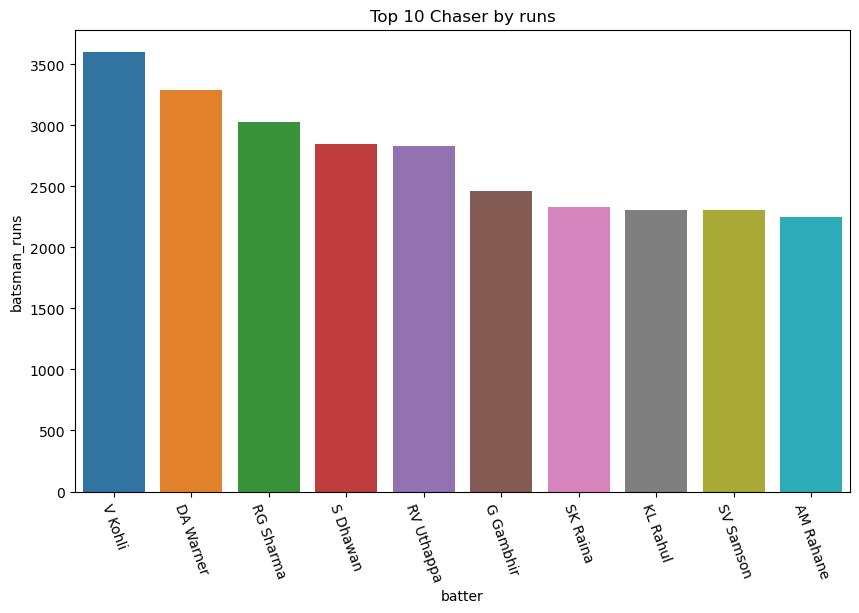

In [240]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_chasers_by_runs,x= 'batter',y = 'batsman_runs',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10 Chaser by runs')
plt.show()

In [241]:
top_10_chasers_by_strike_rate = second_inning_batsman_stat.sort_values(by = 'strike_rate',ascending=False).head(10)
top_10_chasers_by_strike_rate

,batter,batsman_runs,balls_faced,player_dismissed,dismissals,average,strike_rate
284,L Wood,9,3,NaN,0.0,inf,300.000000
378,OF Smith,25,9,NaN,0.0,inf,277.777778
90,B Stanlake,5,2,NaN,0.0,inf,250.000000
538,Shahid Afridi,54,23,Shahid Afridi,3.0,18.000000,234.782609
420,R Sai Kishore,13,6,R Sai Kishore,1.0,13.000000,216.666667
211,J Fraser-McGurk,161,76,J Fraser-McGurk,4.0,40.250000,211.842105
80,Avesh Khan,31,15,Avesh Khan,1.0,31.000000,206.666667
598,WG Jacks,163,81,WG Jacks,3.0,54.333333,201.234568
579,Umar Gul,26,13,Umar Gul,2.0,13.000000,200.000000
453,RS Sodhi,4,2,NaN,0.0,inf,200.000000


In [242]:
#lets make minimum 500 run scored by batsmen
top_10_chasers_by_strike_rate = second_inning_batsman_stat[second_inning_batsman_stat['batsman_runs'] > 499].sort_values(by = 'strike_rate',ascending=False).head(10)
top_10_chasers_by_strike_rate

,batter,batsman_runs,balls_faced,player_dismissed,dismissals,average,strike_rate
360,N Pooran,1000,611,N Pooran,26.0,38.461538,163.666121
37,AD Russell,1085,674,AD Russell,43.0,25.232558,160.979228
516,SP Narine,702,444,SP Narine,46.0,15.260870,158.108108
582,V Sehwag,1427,906,V Sehwag,51.0,27.980392,157.505519
512,SO Hetmyer,589,375,SO Hetmyer,18.0,32.722222,157.066667
185,GJ Maxwell,1134,743,GJ Maxwell,43.0,26.372093,152.624495
218,JC Buttler,1803,1199,JC Buttler,48.0,37.562500,150.375313
66,Abhishek Sharma,730,492,Abhishek Sharma,30.0,24.333333,148.373984
605,YBK Jaiswal,864,587,YBK Jaiswal,24.0,36.000000,147.189097
486,SA Yadav,1736,1182,SA Yadav,54.0,32.148148,146.869712


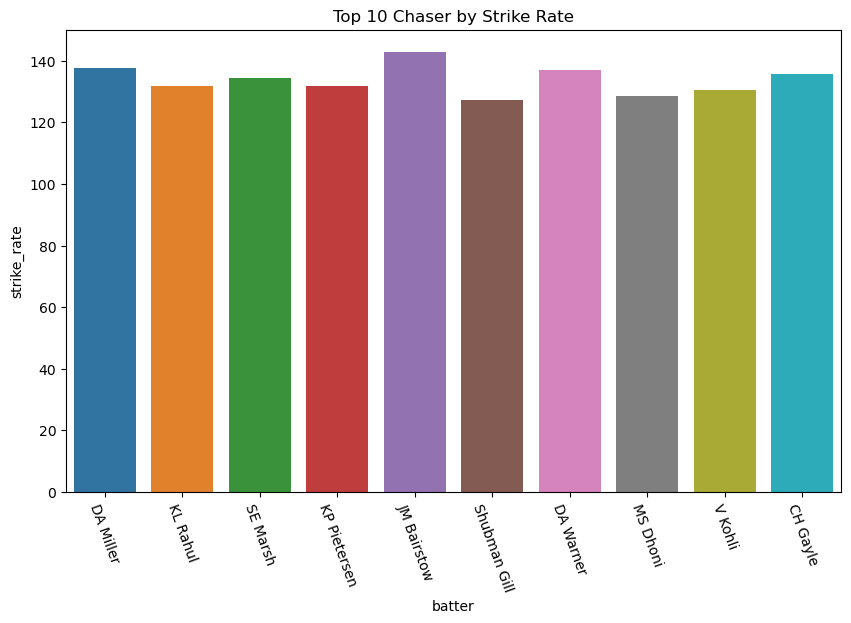

In [277]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_chasers_by_strike_rate,x= 'batter',y = 'strike_rate',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10 Chaser by Strike Rate')
plt.show()

In [245]:
#top 10 by average
top_10_chasers_by_average = second_inning_batsman_stat[second_inning_batsman_stat['batsman_runs'] > 499].sort_values(by = 'average',ascending=False).head(10)
top_10_chasers_by_average

,batter,batsman_runs,balls_faced,player_dismissed,dismissals,average,strike_rate
133,DA Miller,1699,1233,DA Miller,34.0,49.970588,137.793998
261,KL Rahul,2310,1753,KL Rahul,47.0,49.148936,131.774102
497,SE Marsh,1060,788,SE Marsh,25.0,42.400000,134.517766
267,KP Pietersen,640,486,KP Pietersen,16.0,40.000000,131.687243
230,JM Bairstow,1065,745,JM Bairstow,27.0,39.444444,142.953020
544,Shubman Gill,1575,1237,Shubman Gill,40.0,39.375000,127.324171
134,DA Warner,3285,2395,DA Warner,84.0,39.107143,137.160752
341,MS Dhoni,2178,1693,MS Dhoni,56.0,38.892857,128.647372
581,V Kohli,3604,2759,V Kohli,93.0,38.752688,130.627039
114,CH Gayle,2092,1543,CH Gayle,54.0,38.740741,135.580039


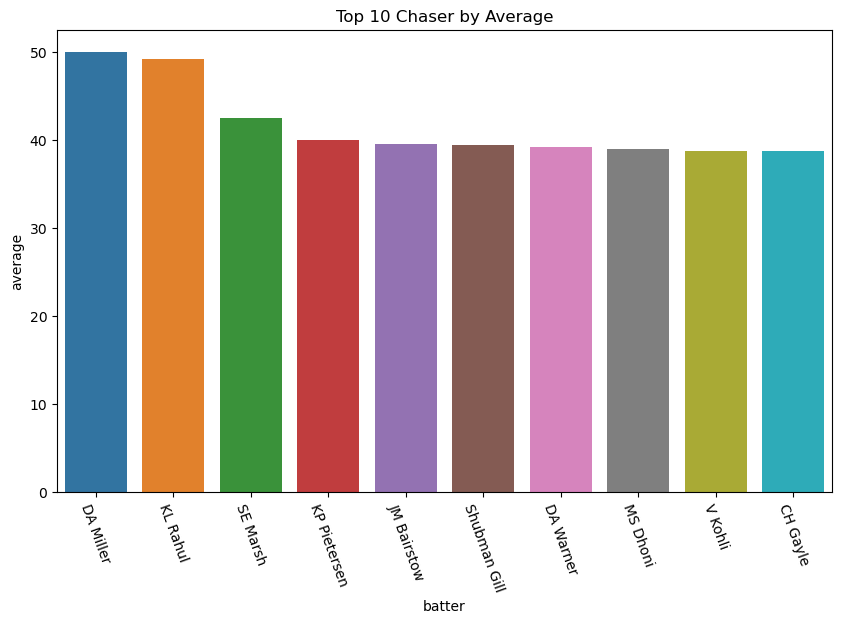

In [276]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_chasers_by_average,x= 'batter',y = 'average',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10 Chaser by Average')
plt.show()

*lets define some rules to find top 10 chaser batsman*
- strike rate should be above 130
- average should be greater than 30
- minimum run scored should be 1500
- ranking according to run_scored



In [250]:
top_10_chasers = second_inning_batsman_stat[(second_inning_batsman_stat['batsman_runs'] > 1500) &(second_inning_batsman_stat['strike_rate']>130) &(second_inning_batsman_stat['average']>29)].sort_values(by = 'batsman_runs',ascending=False).head(10)
top_10_chasers

,batter,batsman_runs,balls_faced,player_dismissed,dismissals,average,strike_rate
581,V Kohli,3604,2759,V Kohli,93.0,38.752688,130.627039
134,DA Warner,3285,2395,DA Warner,84.0,39.107143,137.160752
501,SK Raina,2334,1752,SK Raina,71.0,32.873239,133.219178
261,KL Rahul,2310,1753,KL Rahul,47.0,49.148936,131.774102
519,SR Watson,2162,1572,SR Watson,67.0,32.268657,137.531807
114,CH Gayle,2092,1543,CH Gayle,54.0,38.740741,135.580039
171,F du Plessis,2051,1533,F du Plessis,59.0,34.762712,133.789954
28,AB de Villiers,1999,1482,AB de Villiers,61.0,32.770492,134.885290
606,YK Pathan,1879,1293,YK Pathan,57.0,32.964912,145.320959
218,JC Buttler,1803,1199,JC Buttler,48.0,37.562500,150.375313


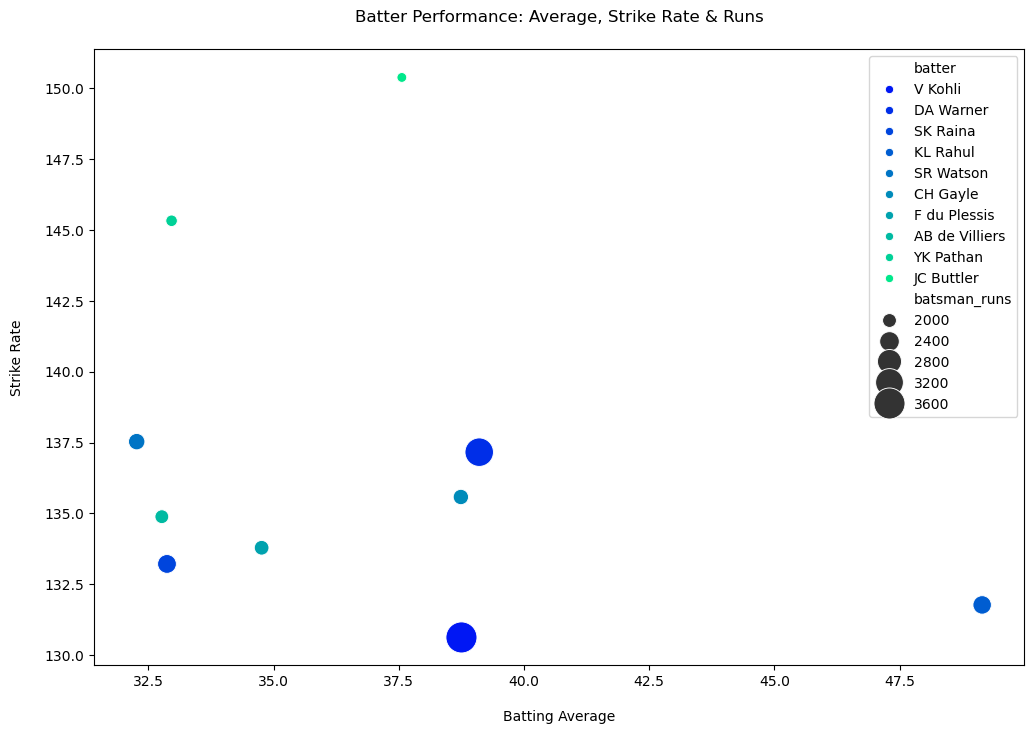

In [258]:
plt.figure(figsize=(12, 8))

# Scatterplot with bubble size representing runs
sns.scatterplot(
    data=top_10_chasers,
    x='average',  # x-axis: batting average
    y='strike_rate',  # y-axis: strike rate
    marker = 'o',
    size='batsman_runs',  # Bubble size based on runs
    hue='batter',  # Different colors for batters
    palette='winter',
    sizes=(50, 500),  # Adjusting bubble sizes
    legend=True  # You can enable this if desired
)

plt.title('Batter Performance: Average, Strike Rate & Runs', pad=20)
plt.xlabel('Batting Average', labelpad=15)
plt.ylabel('Strike Rate', labelpad=15)
plt.show()

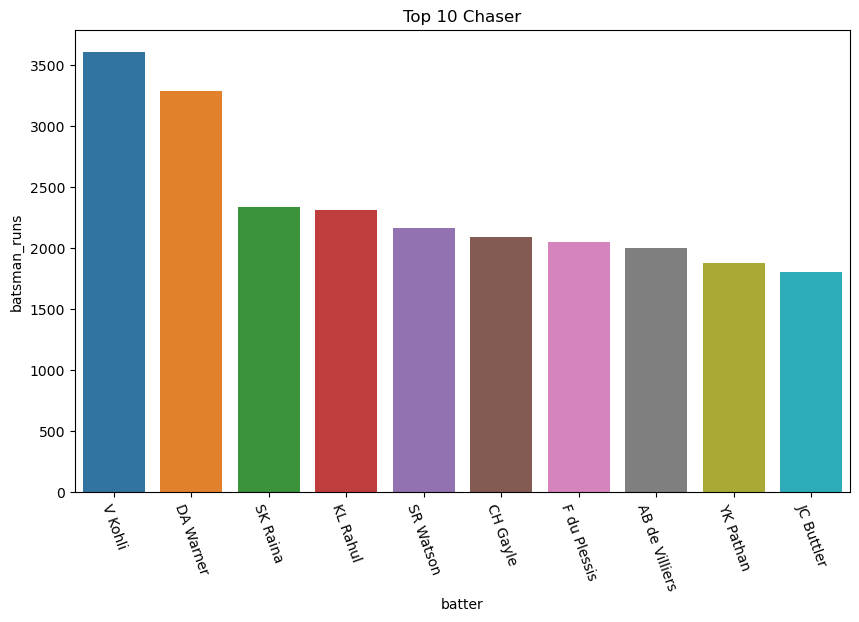

In [259]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_chasers,x= 'batter',y = 'batsman_runs',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10 Chaser')
plt.show()

## 2.Powerplay Specialists (Overs 1-6)

*Objective: Find batsmen who excel in the powerplay.*

In [265]:
ball_data = pd.read_csv('deliveries.csv')
ball_data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [267]:
# Filter the DataFrame for overs between 0 and 6
ball_data = ball_data[ball_data['over'].isin([0, 1, 2, 3, 4, 5])]
ball_data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260888,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,2,VR Iyer,T Natarajan,Rahmanullah Gurbaz,4,0,4,NaN,0,NaN,NaN,NaN
260889,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,3,VR Iyer,T Natarajan,Rahmanullah Gurbaz,6,0,6,NaN,0,NaN,NaN,NaN
260890,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,4,VR Iyer,T Natarajan,Rahmanullah Gurbaz,4,0,4,NaN,0,NaN,NaN,NaN
260891,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,5,VR Iyer,T Natarajan,Rahmanullah Gurbaz,1,0,1,NaN,0,NaN,NaN,NaN


In [269]:
powerplay_batsman_stat = ball_data.groupby('batter')['batsman_runs'].agg(['sum','count']).reset_index()
powerplay_batsman_stat.rename(columns={"sum":"powerplay_total_runs","count":"ball_faced_in_powerplay"},inplace=True)
powerplay_batsman_stat

,batter,powerplay_total_runs,ball_faced_in_powerplay
0,A Ashish Reddy,5,7
1,A Badoni,18,38
2,A Chopra,27,41
3,A Flintoff,14,15
4,A Manohar,12,18
...,...,...,...
357,YV Takawale,121,137
358,Yashpal Singh,17,37
359,Younis Khan,3,7
360,Yuvraj Singh,193,197


In [270]:
powerplay_batsman_stat['strike_rate_powerplay'] = powerplay_batsman_stat['powerplay_total_runs']/powerplay_batsman_stat['ball_faced_in_powerplay'] * 100
powerplay_batsman_stat

,batter,powerplay_total_runs,ball_faced_in_powerplay,strike_rate_powerplay
0,A Ashish Reddy,5,7,71.428571
1,A Badoni,18,38,47.368421
2,A Chopra,27,41,65.853659
3,A Flintoff,14,15,93.333333
4,A Manohar,12,18,66.666667
...,...,...,...,...
357,YV Takawale,121,137,88.321168
358,Yashpal Singh,17,37,45.945946
359,Younis Khan,3,7,42.857143
360,Yuvraj Singh,193,197,97.969543


In [271]:
powerplay_batsman_stat.sort_values(by = 'powerplay_total_runs',ascending=False)

,batter,powerplay_total_runs,ball_faced_in_powerplay,strike_rate_powerplay
272,S Dhawan,3415,2862,119.322152
76,DA Warner,3318,2501,132.666933
337,V Kohli,2809,2347,119.684704
67,CH Gayle,2405,1851,129.929768
30,AM Rahane,2319,2013,115.201192
...,...,...,...,...
174,M Rawat,0,2,0.000000
293,SN Thakur,0,4,0.000000
125,JC Archer,0,4,0.000000
105,GD Phillips,0,7,0.000000


In [272]:
powerplay_batsman_stat.sort_values(by = 'strike_rate_powerplay',ascending=False)

,batter,powerplay_total_runs,ball_faced_in_powerplay,strike_rate_powerplay
148,KK Cooper,7,2,350.000000
68,CH Morris,17,7,242.857143
24,AD Russell,41,17,241.176471
313,Shahid Afridi,43,18,238.888889
123,J Fraser-McGurk,266,112,237.500000
...,...,...,...,...
132,JL Denly,0,1,0.000000
343,Virat Singh,0,2,0.000000
125,JC Archer,0,4,0.000000
105,GD Phillips,0,7,0.000000


In [273]:
#lets say minimum 100 ball faced in powerplay and then finding top 10 power hitters
top_10_powerplay_hitter = powerplay_batsman_stat[powerplay_batsman_stat['ball_faced_in_powerplay'] > 99].sort_values(by = 'strike_rate_powerplay',ascending=False)
top_10_powerplay_hitter = top_10_powerplay_hitter.head(10)
top_10_powerplay_hitter

,batter,powerplay_total_runs,ball_faced_in_powerplay,strike_rate_powerplay
123,J Fraser-McGurk,266,112,237.500000
331,TM Head,412,211,195.260664
232,PD Salt,404,242,166.942149
298,SP Narine,946,577,163.951473
60,C Green,196,124,158.064516
40,Abhishek Sharma,758,501,151.297405
354,YBK Jaiswal,1009,677,149.039882
168,LS Livingstone,163,111,146.846847
245,R Ravindra,169,117,144.444444
188,MJ Lumb,225,157,143.312102


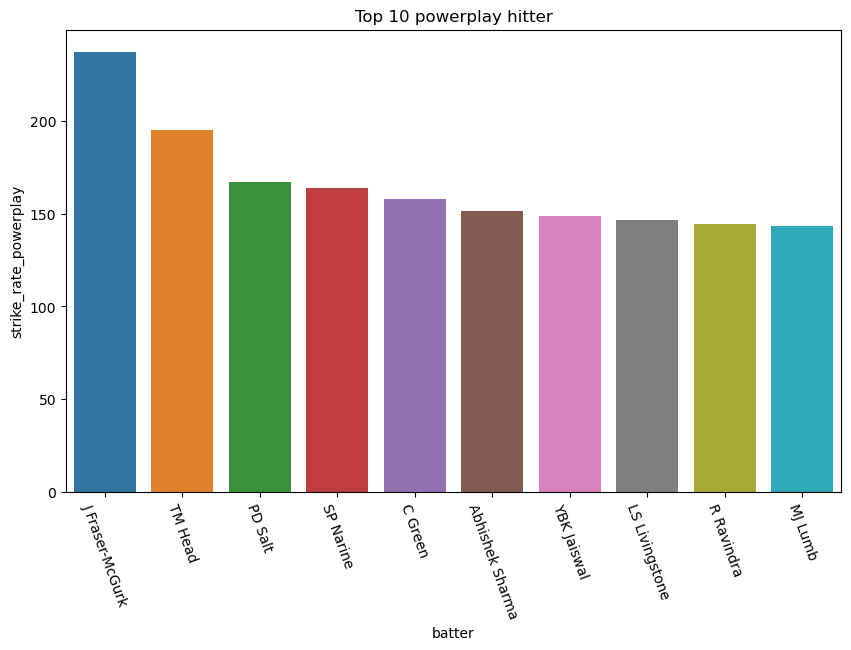

In [288]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_powerplay_hitter,x = 'batter',y = 'strike_rate_powerplay',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10 powerplay hitter')
plt.show()

## 3.Death Overs Hitters (Overs 16-20)

In [278]:
ball_data = pd.read_csv('deliveries.csv')
ball_data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [279]:
ball_data = ball_data[ball_data['over'].isin([15,16,17,18,19])]
ball_data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
94,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,NaN,0,NaN,NaN,NaN
95,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,2,DJ Hussey,AA Noffke,BB McCullum,1,0,1,NaN,0,NaN,NaN,NaN
96,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,3,BB McCullum,AA Noffke,DJ Hussey,2,0,2,NaN,0,NaN,NaN,NaN
97,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,4,BB McCullum,AA Noffke,DJ Hussey,0,0,0,NaN,0,NaN,NaN,NaN
98,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,5,BB McCullum,AA Noffke,DJ Hussey,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN
260849,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,SP Narine,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN
260850,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN
260851,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN


In [281]:
death_over_batting_stat = ball_data.groupby('batter')['batsman_runs'].agg(['sum','count']).reset_index().rename(columns = {"sum":'death_over_runs',"count":"death_over_ball_faced"})
death_over_batting_stat

,batter,death_over_runs,death_over_ball_faced
0,A Ashish Reddy,214,148
1,A Badoni,380,257
2,A Chandila,4,7
3,A Chopra,1,2
4,A Choudhary,25,20
...,...,...,...
597,Yash Dayal,0,1
598,Yashpal Singh,17,13
599,Yudhvir Singh,20,12
600,Yuvraj Singh,906,535


In [282]:
death_over_batting_stat['strike_rate'] = death_over_batting_stat['death_over_runs']/death_over_batting_stat['death_over_ball_faced'] * 100
death_over_batting_stat

,batter,death_over_runs,death_over_ball_faced,strike_rate
0,A Ashish Reddy,214,148,144.594595
1,A Badoni,380,257,147.859922
2,A Chandila,4,7,57.142857
3,A Chopra,1,2,50.000000
4,A Choudhary,25,20,125.000000
...,...,...,...,...
597,Yash Dayal,0,1,0.000000
598,Yashpal Singh,17,13,130.769231
599,Yudhvir Singh,20,12,166.666667
600,Yuvraj Singh,906,535,169.345794


In [283]:
death_over_batting_stat = death_over_batting_stat[death_over_batting_stat['death_over_ball_faced'] > 99]
death_over_batting_stat

,batter,death_over_runs,death_over_ball_faced,strike_rate
0,A Ashish Reddy,214,148,144.594595
1,A Badoni,380,257,147.859922
10,A Mishra,260,264,98.484848
17,A Symonds,293,197,148.730964
27,AB de Villiers,1868,867,215.455594
...,...,...,...,...
589,Y Nagar,179,135,132.592593
591,Y Venugopal Rao,387,260,148.846154
594,YK Pathan,1126,732,153.825137
600,Yuvraj Singh,906,535,169.345794


In [286]:
top_10_death_over_batter_by_runs = death_over_batting_stat.sort_values(by = 'death_over_runs',ascending=False).head(10)

In [287]:
top_10_death_over_batter_by_runs

,batter,death_over_runs,death_over_ball_faced,strike_rate
337,MS Dhoni,3292,1958,168.130746
250,KA Pollard,2032,1270,160.000000
255,KD Karthik,1904,1151,165.421373
27,AB de Villiers,1868,867,215.455594
425,RA Jadeja,1680,1176,142.857143
431,RG Sharma,1513,868,174.308756
567,V Kohli,1469,824,178.276699
34,AD Russell,1324,739,179.161028
130,DA Miller,1298,768,169.010417
190,HH Pandya,1290,798,161.654135


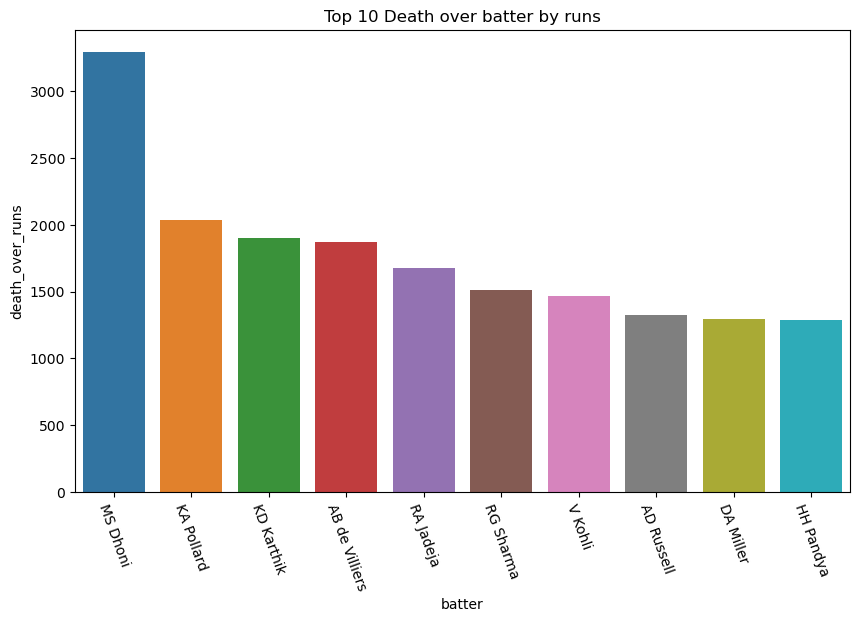

In [289]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_death_over_batter_by_runs,x = 'batter',y = 'death_over_runs',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10 Death over batter by runs')
plt.show()

In [291]:
top_10_death_over_batter_by_strike_rate = death_over_batting_stat.sort_values(by = 'strike_rate',ascending=False).head(10)
top_10_death_over_batter_by_strike_rate

,batter,death_over_runs,death_over_ball_faced,strike_rate
546,T Stubbs,270,115,234.782609
27,AB de Villiers,1868,867,215.455594
310,MA Agarwal,247,119,207.563025
292,LS Livingstone,284,143,198.601399
101,C Green,204,106,192.452830
444,RR Pant,923,480,192.291667
109,CH Gayle,581,304,191.118421
318,MEK Hussey,261,138,189.130435
415,R Powell,229,122,187.704918
217,JC Buttler,596,319,186.833856


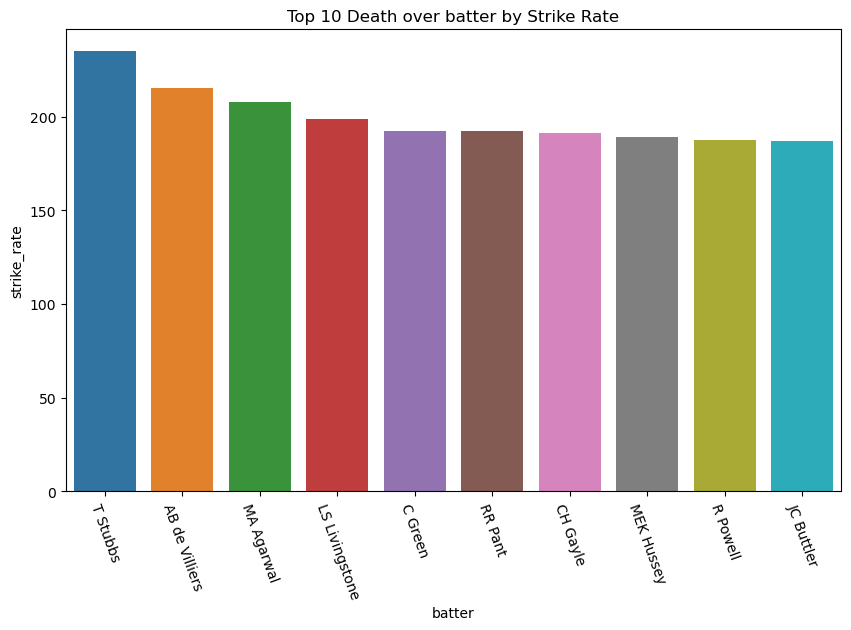

In [292]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_death_over_batter_by_strike_rate,x = 'batter',y = 'strike_rate',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10 Death over batter by Strike Rate')
plt.show()

*AB de Villiers is only player to be included both by runs and strike rate so he is best death over batter ever*

# **Boundary Hitters**

In [293]:
deliveries = pd.read_csv('deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [294]:
#finding deliveries with 4s and 6s only
deliveries = deliveries[(deliveries['batsman_runs'] == 4) | (deliveries['batsman_runs'] == 6)]
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
10,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,Z Khan,SC Ganguly,6,0,6,NaN,0,NaN,NaN,NaN
11,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
16,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,4,BB McCullum,P Kumar,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260890,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,4,VR Iyer,T Natarajan,Rahmanullah Gurbaz,4,0,4,NaN,0,NaN,NaN,NaN
260895,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,6,3,Rahmanullah Gurbaz,Shahbaz Ahmed,VR Iyer,6,0,6,NaN,0,NaN,NaN,NaN
260904,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,7,6,Rahmanullah Gurbaz,JD Unadkat,VR Iyer,4,0,4,NaN,0,NaN,NaN,NaN
260908,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,8,4,Rahmanullah Gurbaz,Shahbaz Ahmed,VR Iyer,6,0,6,NaN,0,NaN,NaN,NaN


In [301]:
boundries = deliveries.groupby('batter')['batsman_runs'].count().reset_index().rename(columns = {"batsman_runs":"boundries"})
top_10_boundry_hitter = boundries.sort_values(by = 'boundries',ascending=False).head(10)
top_10_boundry_hitter

,batter,boundries
532,V Kohli,981
437,S Dhawan,921
126,DA Warner,899
409,RG Sharma,880
109,CH Gayle,767
462,SK Raina,710
25,AB de Villiers,667
427,RV Uthappa,663
243,KD Karthik,627
323,MS Dhoni,615


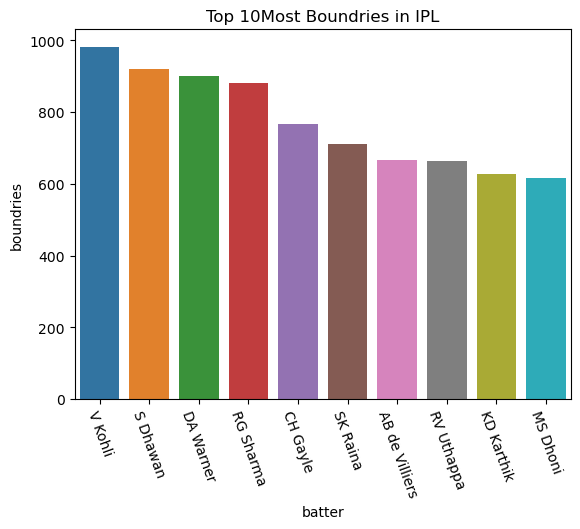

In [304]:
sns.barplot(data = top_10_boundry_hitter,x = 'batter',y='boundries',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10Most Boundries in IPL')
plt.show()

In [305]:
fours = deliveries[(deliveries['batsman_runs'] == 4)]
fours

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
11,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
16,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,4,BB McCullum,P Kumar,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
22,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,4,SC Ganguly,AA Noffke,BB McCullum,4,0,4,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260887,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,1,VR Iyer,T Natarajan,Rahmanullah Gurbaz,4,0,4,NaN,0,NaN,NaN,NaN
260888,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,2,VR Iyer,T Natarajan,Rahmanullah Gurbaz,4,0,4,NaN,0,NaN,NaN,NaN
260890,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,4,VR Iyer,T Natarajan,Rahmanullah Gurbaz,4,0,4,NaN,0,NaN,NaN,NaN
260904,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,7,6,Rahmanullah Gurbaz,JD Unadkat,VR Iyer,4,0,4,NaN,0,NaN,NaN,NaN


In [306]:
four_count = fours.groupby('batter')['batsman_runs'].count().reset_index().rename(columns = {"batsman_runs":"4s_count"})
top_10_four_hitter = four_count.sort_values(by = '4s_count',ascending=False).head(10)
top_10_four_hitter

,batter,4s_count
416,S Dhawan,768
508,V Kohli,708
119,DA Warner,663
388,RG Sharma,599
441,SK Raina,506
158,G Gambhir,492
406,RV Uthappa,481
43,AM Rahane,479
230,KD Karthik,466
155,F du Plessis,422


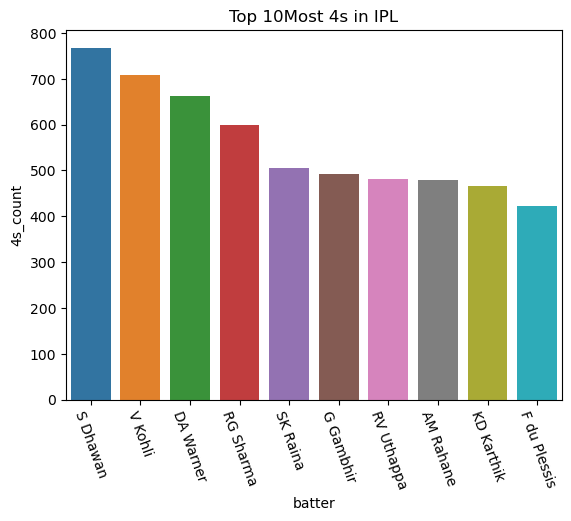

In [308]:
sns.barplot(data = top_10_four_hitter,x = 'batter',y='4s_count',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10Most 4s in IPL')
plt.show()

In [309]:
sixs = deliveries[(deliveries['batsman_runs'] == 6)]
sixs

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
10,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,Z Khan,SC Ganguly,6,0,6,NaN,0,NaN,NaN,NaN
20,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,2,BB McCullum,AA Noffke,SC Ganguly,6,0,6,NaN,0,NaN,NaN,NaN
25,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,7,BB McCullum,AA Noffke,SC Ganguly,6,0,6,NaN,0,NaN,NaN,NaN
60,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,9,5,BB McCullum,SB Joshi,RT Ponting,6,0,6,NaN,0,NaN,NaN,NaN
65,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,10,4,RT Ponting,JH Kallis,BB McCullum,6,0,6,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260868,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,2,2,VR Iyer,B Kumar,Rahmanullah Gurbaz,6,0,6,NaN,0,NaN,NaN,NaN
260869,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,2,3,VR Iyer,B Kumar,Rahmanullah Gurbaz,6,0,6,NaN,0,NaN,NaN,NaN
260889,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,5,3,VR Iyer,T Natarajan,Rahmanullah Gurbaz,6,0,6,NaN,0,NaN,NaN,NaN
260895,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,6,3,Rahmanullah Gurbaz,Shahbaz Ahmed,VR Iyer,6,0,6,NaN,0,NaN,NaN,NaN


In [310]:
six_count = sixs.groupby('batter')['batsman_runs'].count().reset_index().rename(columns = {"batsman_runs":"6s_count"})
top_10_six_hitter = six_count.sort_values(by = '6s_count',ascending=False).head(10)
top_10_six_hitter

,batter,6s_count
84,CH Gayle,359
324,RG Sharma,281
427,V Kohli,273
14,AB de Villiers,253
254,MS Dhoni,252
98,DA Warner,236
184,KA Pollard,224
23,AD Russell,209
387,SV Samson,206
365,SK Raina,204


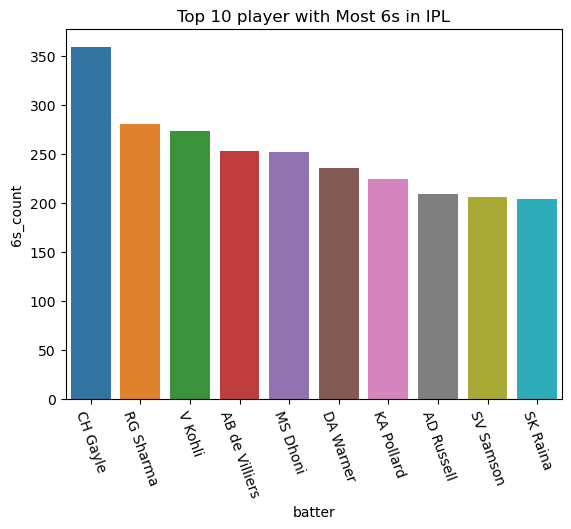

In [311]:
sns.barplot(data = top_10_six_hitter,x = 'batter',y='6s_count',hue = 'batter')
plt.xticks(rotation = -70)
plt.title('Top 10 player with Most 6s in IPL')
plt.show()